In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("spaceship-titanic/train.csv")
test = pd.read_csv("spaceship-titanic/test.csv")

In [3]:
df.sample(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7888,8419_02,Earth,True,G/1349/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Doryn Mosepherry,True
5261,5613_01,Earth,False,F/1072/S,TRAPPIST-1e,32.0,False,125.0,874.0,0.0,180.0,1.0,Leene Hardonald,True
1622,1717_01,Earth,False,E/105/P,TRAPPIST-1e,40.0,False,813.0,0.0,473.0,236.0,0.0,Alicey Franankson,True


In [4]:
df.drop(columns=['PassengerId','Name'],inplace=True)
test.drop(columns=['PassengerId','Name'],inplace=True)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [7]:
test.isna().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [8]:
df.isna().mean()*100

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [9]:
drop_df = df.dropna()

print(df.shape,drop_df.shape)

(8693, 12) (6764, 12)


In [10]:
num_cols = df.select_dtypes(exclude=['object','bool']).columns.to_list()
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
tar_cot = ['Transported']

In [11]:
cat_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

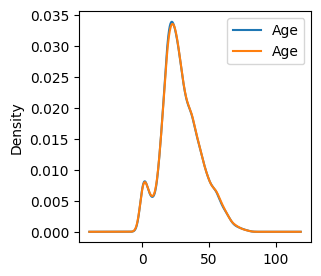

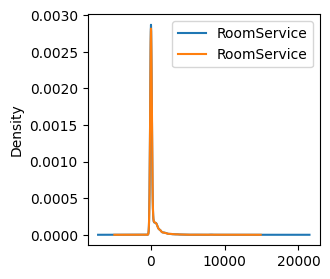

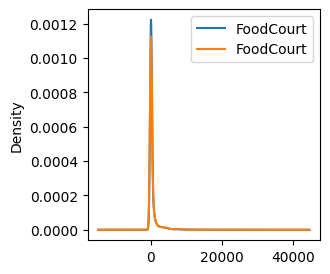

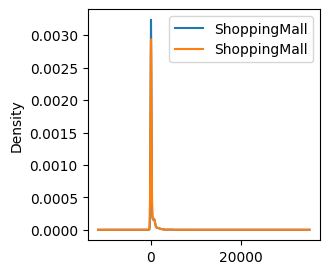

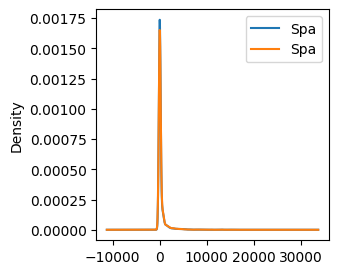

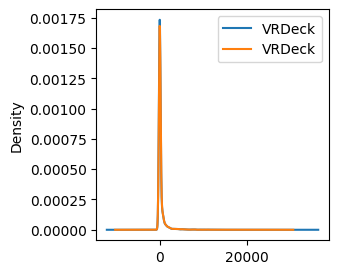

In [12]:
for col in num_cols:
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    
    df[col].plot(kind = 'kde', ax= ax)
    drop_df[col].plot(kind = 'kde', ax= ax)
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')
    
    plt.show()

In [13]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df[num_cols].sample(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1595,27.0,3482.0,1234.0,1155.0,0.0,0.0
4178,18.0,0.0,0.0,0.0,0.0,0.0
6564,26.0,0.0,0.0,677.0,1.0,108.0
1618,27.0,103.0,1.0,49.0,2421.0,24.0
3261,21.0,196.0,5.0,674.0,12.0,20.0


In [16]:
for col in df.columns:
    print(col, df[col].nunique())

HomePlanet 3
CryoSleep 2
Cabin 5413
Destination 3
Age 80
VIP 2
RoomService 1112
FoodCourt 1318
ShoppingMall 1000
Spa 1162
VRDeck 1125
Transported 2


In [17]:
for col in df.columns:
    if(df[col].nunique() < 5):
        print(col, df[col].value_counts())

HomePlanet HomePlanet
Earth     3655
Europa    1708
Mars      1392
Name: count, dtype: int64
CryoSleep CryoSleep
False    4382
True     2373
Name: count, dtype: int64
Destination Destination
TRAPPIST-1e      4677
55 Cancri e      1438
PSO J318.5-22     640
Name: count, dtype: int64
VIP VIP
False    6591
True      164
Name: count, dtype: int64
Transported Transported
True     3392
False    3363
Name: count, dtype: int64


In [18]:
cat_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [19]:
one_hot_cols = [col for col in cat_cols if col not in ['Cabin']]
mixed_cat_col = ['Cabin']

In [20]:
one_hot_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [21]:
# df = pd.get_dummies(df,columns=one_hot_cols)
# df = df.astype(int)
# df.sample(5)

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[one_hot_cols])
encoded_cols = list(encoder.get_feature_names_out(one_hot_cols))
df[encoded_cols] = encoder.transform(df[one_hot_cols])
test[encoded_cols] = encoder.transform(test[one_hot_cols])

In [23]:
df.drop(columns=one_hot_cols,inplace=True)
test.drop(columns=one_hot_cols,inplace=True)

In [24]:
df.sample(3)

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
1053,B/40/P,28.0,0.0,402.0,0.0,135.0,9010.0,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1091,G/175/P,18.0,0.0,0.0,0.0,0.0,0.0,True,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4837,D/156/S,41.0,0.0,0.0,0.0,0.0,0.0,True,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [25]:
df.columns

Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'],
      dtype='object')

In [26]:
test.columns

Index(['Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True'],
      dtype='object')

In [27]:
input_cols = test.columns

In [ ]:
# train['num_cabin'] = pd.to_numeric(train

In [28]:
drop_df['Cabin_Frequency'] = drop_df['Cabin'].map(drop_df['Cabin'].value_counts())

drop_df.sample(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12400\832744698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['Cabin_Frequency'] = drop_df['Cabin'].map(drop_df['Cabin'].value_counts())


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Frequency
4719,Earth,False,G/814/P,TRAPPIST-1e,24.0,False,5.0,1.0,7.0,0.0,895.0,False,2
3357,Europa,True,C/118/P,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,True,2
834,Earth,True,G/129/P,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,True,1
7511,Mars,True,E/532/S,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1
6283,Earth,True,G/1086/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,True,2


In [ ]:
train['Cabin_Frequency'] = train['Cabin'].map(train['Cabin'].value_counts())
test['Cabin_Frequency'] = test['Cabin'].map(test['Cabin'].value_counts())

In [29]:
df['Cabin_Frequency'] = df['Cabin'].map(df['Cabin'].value_counts())
test['Cabin_Frequency'] = test['Cabin'].map(test['Cabin'].value_counts())

In [30]:
df.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [31]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_Frequency
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1


In [32]:
num_cols.append('Cabin_Frequency')

num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_Frequency']

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
test[num_cols] = scaler.fit_transform(test[num_cols])

In [34]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_Frequency
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000
1,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000
2,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.166667
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,False,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.166667
4,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,True,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000


In [35]:
from sklearn.model_selection import train_test_split

print(df.shape)

train,val = train_test_split(df,random_state=69,test_size=0.2)

print(train.shape,val.shape)

(6755, 18)
(5404, 18) (1351, 18)


In [36]:
train.sample(4)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Cabin_Frequency
4687,0.544304,0.000000,0.000000,0.000000,0.000000,0.000000,True,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8457,0.177215,0.000000,0.000000,0.000000,0.000000,0.000000,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5
2109,0.544304,0.048891,0.000134,0.005789,0.002142,0.000000,False,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1476,0.202532,0.000000,0.050951,0.000000,0.000000,0.037667,False,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Cabin_Frequency'],
      dtype='object')

In [38]:
test.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_Frequency'],
      dtype='object')

In [43]:
input_cols = test.columns

input_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'Cabin_Frequency'],
      dtype='object')

In [44]:
tar_cot

['Transported']

In [45]:
train_in = train[input_cols].copy()
train_tr = train[tar_cot].copy()
val_in = val[input_cols].copy()
val_tr = val[tar_cot].copy()
test_in = test[input_cols].copy()

In [46]:
from lazypredict.Supervised import LazyClassifier
from IPython.display import clear_output

clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(train_in, val_in, train_tr, val_tr)
clear_output()

In [47]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.53
AdaBoostClassifier,0.79,0.79,0.79,0.79,0.90
XGBClassifier,0.79,0.79,0.79,0.79,0.55
SGDClassifier,0.79,0.78,0.78,0.79,0.16
SVC,0.78,0.78,0.78,0.78,3.49
NuSVC,0.78,0.78,0.78,0.78,4.30
LogisticRegression,0.78,0.78,0.78,0.78,0.10
CalibratedClassifierCV,0.78,0.78,0.78,0.78,0.37
LinearSVC,0.78,0.78,0.78,0.78,0.10


In [48]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }

    
    model = LGBMClassifier(**params)
    model.fit(train_in, train_tr)
    score = -model.score(val_in, val_tr)
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best Parameters:", study.best_params)

[I 2025-01-24 01:10:26,414] A new study created in memory with name: no-name-de93a4f4-119c-4075-9541-1d3ca65615c8


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:26,759] Trial 0 finished with value: -0.7942264988897113 and parameters: {'n_estimators': 162, 'learning_rate': 0.1360522354253613, 'num_leaves': 166, 'max_depth': 4, 'min_child_samples': 191, 'subsample': 0.8265501941986984, 'colsample_bytree': 0.741324684542795, 'reg_alpha': 0.6690728445959236, 'reg_lambda': 0.5964014783761962}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:27,212] Trial 1 finished with value: -0.7897853441894893 and parameters: {'n_estimators': 234, 'learning_rate': 0.2309412708144886, 'num_leaves': 244, 'max_depth': 5, 'min_child_samples': 184, 'subsample': 0.5949523774055009, 'colsample_bytree': 0.9440429454165737, 'reg_alpha': 0.24784930140934625, 'reg_lambda': 0.2617592175115355}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:27,786] Trial 2 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 320, 'learning_rate': 0.1927511999930683, 'num_leaves': 138, 'max_depth': 5, 'min_child_samples': 144, 'subsample': 0.645109238492078, 'colsample_bytree': 0.8215993141289128, 'reg_alpha': 0.2757769799570239, 'reg_lambda': 0.3747674961054268}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory 

[I 2025-01-24 01:10:28,882] Trial 3 finished with value: -0.7801628423390081 and parameters: {'n_estimators': 295, 'learning_rate': 0.15561121177165493, 'num_leaves': 202, 'max_depth': 7, 'min_child_samples': 10, 'subsample': 0.6558222510354907, 'colsample_bytree': 0.8610171633228898, 'reg_alpha': 0.0895075948002858, 'reg_lambda': 0.026699248315949276}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:29,761] Trial 4 finished with value: -0.7809030347890451 and parameters: {'n_estimators': 399, 'learning_rate': 0.23019051390017814, 'num_leaves': 129, 'max_depth': 5, 'min_child_samples': 25, 'subsample': 0.9971115093208167, 'colsample_bytree': 0.9546509880095628, 'reg_alpha': 0.05068872169014138, 'reg_lambda': 0.29202580660112365}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:30,010] Trial 5 finished with value: -0.7890451517394522 and parameters: {'n_estimators': 75, 'learning_rate': 0.033190838093543645, 'num_leaves': 126, 'max_depth': 10, 'min_child_samples': 175, 'subsample': 0.6367579092412469, 'colsample_bytree': 0.91212421228011, 'reg_alpha': 0.10240578987931792, 'reg_lambda': 0.41849971322243595}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:30,547] Trial 6 finished with value: -0.7912657290895633 and parameters: {'n_estimators': 278, 'learning_rate': 0.09621250836009501, 'num_leaves': 80, 'max_depth': 6, 'min_child_samples': 183, 'subsample': 0.7469194118057461, 'colsample_bytree': 0.5361262324033162, 'reg_alpha': 0.07508097192602103, 'reg_lambda': 0.8434413428739985}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total B

[I 2025-01-24 01:10:33,547] Trial 7 finished with value: -0.768319763138416 and parameters: {'n_estimators': 476, 'learning_rate': 0.21368372582578013, 'num_leaves': 176, 'max_depth': 11, 'min_child_samples': 14, 'subsample': 0.9914416878980155, 'colsample_bytree': 0.8410520584425492, 'reg_alpha': 0.04595042506921376, 'reg_lambda': 0.20102915039566582}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:34,457] Trial 8 finished with value: -0.7794226498889711 and parameters: {'n_estimators': 368, 'learning_rate': 0.2033893792964547, 'num_leaves': 257, 'max_depth': 7, 'min_child_samples': 134, 'subsample': 0.5912876206855555, 'colsample_bytree': 0.9355299533984883, 'reg_alpha': 0.35587877429366777, 'reg_lambda': 0.4783534833965851}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:34,781] Trial 9 finished with value: -0.7927461139896373 and parameters: {'n_estimators': 96, 'learning_rate': 0.12065251979817611, 'num_leaves': 114, 'max_depth': 8, 'min_child_samples': 96, 'subsample': 0.7891746639419537, 'colsample_bytree': 0.5872188677553936, 'reg_alpha': 0.06264995783093263, 'reg_lambda': 0.49096250587951007}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2025-01-24 01:10:35,179] Trial 10 finished with value: -0.7831236121391562 and parameters: {'n_estimators': 181, 'learning_rate': 0.29894467244401124, 'num_leaves': 20, 'max_depth': 3, 'min_child_samples': 78, 'subsample': 0.88129548567009, 'colsample_bytree': 0.6797425660920069, 'reg_alpha': 0.7992925365791286, 'reg_lambda': 0.7473988034117487}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:35,623] Trial 11 finished with value: -0.7942264988897113 and parameters: {'n_estimators': 89, 'learning_rate': 0.10071837130612826, 'num_leaves': 65, 'max_depth': 9, 'min_child_samples': 84, 'subsample': 0.8270679033841152, 'colsample_bytree': 0.6599264655990273, 'reg_alpha': 0.6549834920859822, 'reg_lambda': 0.6482865781583117}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, nu

[I 2025-01-24 01:10:36,247] Trial 12 finished with value: -0.7905255366395263 and parameters: {'n_estimators': 157, 'learning_rate': 0.0610777322566039, 'num_leaves': 30, 'max_depth': 9, 'min_child_samples': 61, 'subsample': 0.854424078922235, 'colsample_bytree': 0.7179289110111329, 'reg_alpha': 0.6890975466018556, 'reg_lambda': 0.6756210289904382}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:10:36,807] Trial 13 finished with value: -0.7934863064396743 and parameters: {'n_estimators': 139, 'learning_rate': 0.1146638959930282, 'num_leaves': 206, 'max_depth': 12, 'min_child_samples': 127, 'subsample': 0.8791827923723459, 'colsample_bytree': 0.6516711174382998, 'reg_alpha': 0.6024613072676306, 'reg_lambda': 0.6241415502102486}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:37,057] Trial 14 finished with value: -0.7897853441894893 and parameters: {'n_estimators': 53, 'learning_rate': 0.14897955508654642, 'num_leaves': 300, 'max_depth': 3, 'min_child_samples': 56, 'subsample': 0.7500485826033981, 'colsample_bytree': 0.7736122960833092, 'reg_alpha': 0.9997562834857764, 'reg_lambda': 0.9484650688473008}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:37,799] Trial 15 finished with value: -0.7920059215396003 and parameters: {'n_estimators': 207, 'learning_rate': 0.06356714486695923, 'num_leaves': 79, 'max_depth': 9, 'min_child_samples': 108, 'subsample': 0.8145691575995107, 'colsample_bytree': 0.609589260618784, 'reg_alpha': 0.49122057166361716, 'reg_lambda': 0.5730783384780876}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:38,745] Trial 16 finished with value: -0.7897853441894893 and parameters: {'n_estimators': 116, 'learning_rate': 0.013160970137669772, 'num_leaves': 64, 'max_depth': 9, 'min_child_samples': 157, 'subsample': 0.9246039096618984, 'colsample_bytree': 0.7591771673680399, 'reg_alpha': 0.8201192438519862, 'reg_lambda': 0.7934085372794681}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:39,437] Trial 17 finished with value: -0.7853441894892672 and parameters: {'n_estimators': 220, 'learning_rate': 0.16555643864931452, 'num_leaves': 174, 'max_depth': 4, 'min_child_samples': 116, 'subsample': 0.7035774801324804, 'colsample_bytree': 0.5074883612983991, 'reg_alpha': 0.5048572176977157, 'reg_lambda': 0.9066958650428596}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:40,057] Trial 18 finished with value: -0.7927461139896373 and parameters: {'n_estimators': 126, 'learning_rate': 0.07506297153421872, 'num_leaves': 94, 'max_depth': 8, 'min_child_samples': 199, 'subsample': 0.9213866785844649, 'colsample_bytree': 0.6954952154009105, 'reg_alpha': 0.7760068700565673, 'reg_lambda': 0.6765857427402165}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:10:41,239] Trial 19 finished with value: -0.7868245743893413 and parameters: {'n_estimators': 170, 'learning_rate': 0.12927232599575644, 'num_leaves': 159, 'max_depth': 11, 'min_child_samples': 89, 'subsample': 0.5177628027572756, 'colsample_bytree': 0.6190694079606949, 'reg_alpha': 0.9611328748113169, 'reg_lambda': 0.5654859371187215}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-cho

[I 2025-01-24 01:10:42,518] Trial 20 finished with value: -0.7927461139896373 and parameters: {'n_estimators': 250, 'learning_rate': 0.08637961964901839, 'num_leaves': 54, 'max_depth': 6, 'min_child_samples': 43, 'subsample': 0.8111219830993535, 'colsample_bytree': 0.7571718868596635, 'reg_alpha': 0.5928033452120328, 'reg_lambda': 0.7558981828408057}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:43,247] Trial 21 finished with value: -0.7920059215396003 and parameters: {'n_estimators': 119, 'learning_rate': 0.11771536580116347, 'num_leaves': 206, 'max_depth': 12, 'min_child_samples': 120, 'subsample': 0.8656625650521502, 'colsample_bytree': 0.6556728226343002, 'reg_alpha': 0.6353691079805748, 'reg_lambda': 0.6126021529378519}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0

[I 2025-01-24 01:10:44,773] Trial 22 finished with value: -0.7868245743893413 and parameters: {'n_estimators': 151, 'learning_rate': 0.11007712131144073, 'num_leaves': 216, 'max_depth': 12, 'min_child_samples': 161, 'subsample': 0.9273242693427401, 'colsample_bytree': 0.6610036837127362, 'reg_alpha': 0.5318058170056184, 'reg_lambda': 0.6674807372807758}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:45,411] Trial 23 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 69, 'learning_rate': 0.17878628694200613, 'num_leaves': 153, 'max_depth': 10, 'min_child_samples': 78, 'subsample': 0.7704621453278714, 'colsample_bytree': 0.5563957683780011, 'reg_alpha': 0.7058433000067689, 'reg_lambda': 0.5659395506610174}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:46,015] Trial 24 finished with value: -0.7890451517394522 and parameters: {'n_estimators': 137, 'learning_rate': 0.1458353543339067, 'num_leaves': 241, 'max_depth': 11, 'min_child_samples': 127, 'subsample': 0.8470929917967152, 'colsample_bytree': 0.7242756087167014, 'reg_alpha': 0.4088149163815219, 'reg_lambda': 0.4056173825048058}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:46,603] Trial 25 finished with value: -0.7912657290895633 and parameters: {'n_estimators': 196, 'learning_rate': 0.0478748681346391, 'num_leaves': 184, 'max_depth': 10, 'min_child_samples': 144, 'subsample': 0.9085376013879763, 'colsample_bytree': 0.6453132890932206, 'reg_alpha': 0.887412303597122, 'reg_lambda': 0.6399828304073876}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:47,087] Trial 26 finished with value: -0.7912657290895633 and parameters: {'n_estimators': 94, 'learning_rate': 0.10235682331486862, 'num_leaves': 267, 'max_depth': 12, 'min_child_samples': 199, 'subsample': 0.9586482738236979, 'colsample_bytree': 0.7966389006743215, 'reg_alpha': 0.6140014388884298, 'reg_lambda': 0.8720087827302305}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:47,381] Trial 27 finished with value: -0.7934863064396743 and parameters: {'n_estimators': 53, 'learning_rate': 0.13423043909443527, 'num_leaves': 220, 'max_depth': 4, 'min_child_samples': 102, 'subsample': 0.7098162240121411, 'colsample_bytree': 0.9983653737396038, 'reg_alpha': 0.6922225652585517, 'reg_lambda': 0.7457324194248162}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:47,764] Trial 28 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 94, 'learning_rate': 0.174254848890664, 'num_leaves': 114, 'max_depth': 6, 'min_child_samples': 78, 'subsample': 0.8280016485854799, 'colsample_bytree': 0.7133819305042559, 'reg_alpha': 0.41577581798815877, 'reg_lambda': 0.4897937997190135}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:48,443] Trial 29 finished with value: -0.7809030347890451 and parameters: {'n_estimators': 223, 'learning_rate': 0.27962150235252076, 'num_leaves': 239, 'max_depth': 8, 'min_child_samples': 169, 'subsample': 0.8884328670903839, 'colsample_bytree': 0.590841200399096, 'reg_alpha': 0.5727133210401898, 'reg_lambda': 0.2999931327423916}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:48,989] Trial 30 finished with value: -0.7905255366395263 and parameters: {'n_estimators': 244, 'learning_rate': 0.08462531973852691, 'num_leaves': 147, 'max_depth': 4, 'min_child_samples': 145, 'subsample': 0.7923636770650275, 'colsample_bytree': 0.6227269580107858, 'reg_alpha': 0.7597876327057544, 'reg_lambda': 0.8070009898990956}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:49,335] Trial 31 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 61, 'learning_rate': 0.13160453329947724, 'num_leaves': 228, 'max_depth': 4, 'min_child_samples': 98, 'subsample': 0.6974641060435539, 'colsample_bytree': 0.991362899364902, 'reg_alpha': 0.684695034241789, 'reg_lambda': 0.7391404795853851}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:49,755] Trial 32 finished with value: -0.7875647668393783 and parameters: {'n_estimators': 109, 'learning_rate': 0.14048298289349584, 'num_leaves': 191, 'max_depth': 5, 'min_child_samples': 111, 'subsample': 0.7172954761435918, 'colsample_bytree': 0.8618405651410991, 'reg_alpha': 0.8579608433618013, 'reg_lambda': 0.713718921412439}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:50,212] Trial 33 finished with value: -0.7920059215396003 and parameters: {'n_estimators': 147, 'learning_rate': 0.10598116747749296, 'num_leaves': 218, 'max_depth': 5, 'min_child_samples': 56, 'subsample': 0.8465487777326725, 'colsample_bytree': 0.8030819049710232, 'reg_alpha': 0.7242742065787005, 'reg_lambda': 0.579405783382149}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:50,792] Trial 34 finished with value: -0.7934863064396743 and parameters: {'n_estimators': 332, 'learning_rate': 0.1879897978773002, 'num_leaves': 199, 'max_depth': 3, 'min_child_samples': 90, 'subsample': 0.7346298558652753, 'colsample_bytree': 0.7355951626790244, 'reg_alpha': 0.6531163179104043, 'reg_lambda': 0.12828667409242567}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:51,133] Trial 35 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 81, 'learning_rate': 0.15663849248562567, 'num_leaves': 163, 'max_depth': 4, 'min_child_samples': 67, 'subsample': 0.6703462520565933, 'colsample_bytree': 0.8962437585871659, 'reg_alpha': 0.5364825845759231, 'reg_lambda': 0.5300881322948798}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:51,487] Trial 36 finished with value: -0.7920059215396003 and parameters: {'n_estimators': 52, 'learning_rate': 0.09440722227194938, 'num_leaves': 280, 'max_depth': 7, 'min_child_samples': 135, 'subsample': 0.6108931903492862, 'colsample_bytree': 0.6962062937797812, 'reg_alpha': 0.44241519115859235, 'reg_lambda': 0.9808557093145394}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:10:52,177] Trial 37 finished with value: -0.7875647668393783 and parameters: {'n_estimators': 174, 'learning_rate': 0.12884677589236043, 'num_leaves': 141, 'max_depth': 7, 'min_child_samples': 45, 'subsample': 0.7767198863642393, 'colsample_bytree': 0.9994387871073487, 'reg_alpha': 0.7397669148759541, 'reg_lambda': 0.4384161298186732}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:53,227] Trial 38 finished with value: -0.7809030347890451 and parameters: {'n_estimators': 421, 'learning_rate': 0.24204968191655046, 'num_leaves': 226, 'max_depth': 6, 'min_child_samples': 152, 'subsample': 0.6723569704351376, 'colsample_bytree': 0.6797835225188883, 'reg_alpha': 0.5802905090823278, 'reg_lambda': 0.8397675316845264}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:53,937] Trial 39 finished with value: -0.7868245743893413 and parameters: {'n_estimators': 304, 'learning_rate': 0.1606536910323513, 'num_leaves': 255, 'max_depth': 5, 'min_child_samples': 186, 'subsample': 0.8243682904052473, 'colsample_bytree': 0.5675193903723933, 'reg_alpha': 0.3362222181591138, 'reg_lambda': 0.6206576592332088}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-24 01:10:54,438] Trial 40 finished with value: -0.7934863064396743 and parameters: {'n_estimators': 78, 'learning_rate': 0.03682443783697277, 'num_leaves': 129, 'max_depth': 11, 'min_child_samples': 98, 'subsample': 0.8850034245885585, 'colsample_bytree': 0.8435211927373476, 'reg_alpha': 0.6560096309655238, 'reg_lambda': 0.3686165333982905}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2025-01-24 01:10:55,087] Trial 41 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 330, 'learning_rate': 0.18845606905613088, 'num_leaves': 202, 'max_depth': 3, 'min_child_samples': 87, 'subsample': 0.7385545609491766, 'colsample_bytree': 0.7349284167798211, 'reg_alpha': 0.6540810402194385, 'reg_lambda': 0.07720638603815833}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:55,837] Trial 42 finished with value: -0.7846039970392302 and parameters: {'n_estimators': 376, 'learning_rate': 0.2349218739129169, 'num_leaves': 191, 'max_depth': 3, 'min_child_samples': 86, 'subsample': 0.7321479960835857, 'colsample_bytree': 0.7837291876842494, 'reg_alpha': 0.16673336333139754, 'reg_lambda': 0.1406601634389042}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:56,443] Trial 43 finished with value: -0.7868245743893413 and parameters: {'n_estimators': 269, 'learning_rate': 0.19885959872045625, 'num_leaves': 167, 'max_depth': 4, 'min_child_samples': 122, 'subsample': 0.7604765848866036, 'colsample_bytree': 0.75035223110746, 'reg_alpha': 0.831419350014306, 'reg_lambda': 0.6996890738969757}. Best is trial 0 with value: -0.7942264988897113.
[I 2025-01-24 01:10:56,772] Trial 44 finished with value: -0.7890451517394522 and parameters: {'n_estimators': 104, 'learning_rate': 0.21531401629150204, 'num_leaves': 211, 'max_depth': 3, 'min_child_samples': 106, 'subsample': 0.8022773239232208, 'colsample_bytree': 0.6399182336556045, 'reg_alpha': 0.6704703095900559, 'reg_lambda': 0.26632993380409564}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:10:58,249] Trial 45 finished with value: -0.7794226498889711 and parameters: {'n_estimators': 332, 'learning_rate': 0.11707128124238977, 'num_leaves': 181, 'max_depth': 10, 'min_child_samples': 68, 'subsample': 0.6369292834312039, 'colsample_bytree': 0.6896446386902573, 'reg_alpha': 0.9134912715752382, 'reg_lambda': 0.03915104964995053}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:10:59,167] Trial 46 finished with value: -0.7772020725388601 and parameters: {'n_estimators': 347, 'learning_rate': 0.13486493973558472, 'num_leaves': 200, 'max_depth': 5, 'min_child_samples': 131, 'subsample': 0.6979568943760489, 'colsample_bytree': 0.8832948312259713, 'reg_alpha': 0.6113264187242202, 'reg_lambda': 0.534850761646443}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-01-24 01:11:00,077] Trial 47 finished with value: -0.7801628423390081 and parameters: {'n_estimators': 422, 'learning_rate': 0.1766232401006559, 'num_leaves': 232, 'max_depth': 4, 'min_child_samples': 95, 'subsample': 0.8334572725369704, 'colsample_bytree': 0.9452568880330556, 'reg_alpha': 0.4780528131226729, 'reg_lambda': 0.33631112150767883}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:11:00,717] Trial 48 finished with value: -0.7890451517394522 and parameters: {'n_estimators': 292, 'learning_rate': 0.07463979522274414, 'num_leaves': 113, 'max_depth': 3, 'min_child_samples': 39, 'subsample': 0.8679322085832241, 'colsample_bytree': 0.823370818931223, 'reg_alpha': 0.5576946997259303, 'reg_lambda': 0.21828415032639348}. Best is trial 0 with value: -0.7942264988897113.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[I 2025-01-24 01:11:01,343] Trial 49 finished with value: -0.7883049592894152 and parameters: {'n_estimators': 122, 'learning_rate': 0.15270122500012506, 'num_leaves': 251, 'max_depth': 9, 'min_child_samples': 70, 'subsample': 0.9505899926312705, 'colsample_bytree': 0.7304331457310513, 'reg_alpha': 0.7931629227704291, 'reg_lambda': 0.7605845928411168}. Best is trial 0 with value: -0.7942264988897113.


Best Parameters: {'n_estimators': 162, 'learning_rate': 0.1360522354253613, 'num_leaves': 166, 'max_depth': 4, 'min_child_samples': 191, 'subsample': 0.8265501941986984, 'colsample_bytree': 0.741324684542795, 'reg_alpha': 0.6690728445959236, 'reg_lambda': 0.5964014783761962}


In [49]:
print("Best Parameters:", study.best_params)

Best Parameters: {'n_estimators': 162, 'learning_rate': 0.1360522354253613, 'num_leaves': 166, 'max_depth': 4, 'min_child_samples': 191, 'subsample': 0.8265501941986984, 'colsample_bytree': 0.741324684542795, 'reg_alpha': 0.6690728445959236, 'reg_lambda': 0.5964014783761962}


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
params = {'n_estimators': 162, 'learning_rate': 0.1360522354253613, 
          'num_leaves': 166, 'max_depth': 4, 'min_child_samples': 191, 
          'subsample': 0.8265501941986984, 'colsample_bytree': 0.741324684542795, 
          'reg_alpha': 0.6690728445959236, 'reg_lambda': 0.5964014783761962}

model = LGBMClassifier(random_state=69,**params).fit(train_in, train_tr)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2732, number of negative: 2672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 5404, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505551 -> initscore=0.022207
[LightGBM] [Info] Start training from score 0.022207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [52]:
print(accuracy_score(train_tr,model.predict(train_in)))
print(accuracy_score(val_tr,model.predict(val_in)))

0.8180977054034049
0.7890451517394522


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define parameter grids for hyperparameter tuning
param_grids = {
    "decision_tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "random_forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },
    "xgboost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.6, 0.8, 1.0]
    },
    "lgbm": {
        "n_estimators": [50, 100, 200],
        "max_depth": [-1, 5, 10],
        "learning_rate": [0.01, 0.1, 0.2],
        "num_leaves": [31, 50, 70],
        "subsample": [0.6, 0.8, 1.0]
    },
    "logistic_regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "saga"]
    },
    "svc": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"]
    }
}

# Define models
models = {
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "lgbm": LGBMClassifier(random_state=42),
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "svc": SVC(random_state=42, probability=True)
}

# Define scoring metric
f1_scorer = make_scorer(f1_score, average='weighted')  # Weighted F1 score for imbalanced datasets

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(
        model, param_grids[model_name], cv=3, scoring=f1_scorer, verbose=1, n_jobs=-1
    )
    grid_search.fit(train_in, train_tr)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score for {model_name}: {grid_search.best_score_}\n")

# Evaluate best models on the validation set
for model_name, model in best_models.items():
    val_pred = model.predict(val_in)
    val_f1 = f1_score(val_tr, val_pred, average='weighted')
    print(f"{model_name} validation F1 score: {val_f1}")


Running GridSearchCV for decision_tree...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for decision_tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1 score for decision_tree: 0.7772669539717754

Running GridSearchCV for random_forest...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for random_forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score for random_forest: 0.8011662877444525

Running GridSearchCV for xgboost...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for xgboost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Best F1 score for xgboost: 0.7999631502788253

Running GridSearchCV for lgbm...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive

KeyboardInterrupt: 

In [56]:
params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
model = RandomForestClassifier(random_state=69,**params).fit(train_in, train_tr)
print(accuracy_score(train_tr,model.predict(train_in)))
print(accuracy_score(val_tr,model.predict(val_in)))

0.8536269430051814
0.7920059215396003


In [57]:
sub = pd.read_csv("spaceship-titanic/sample_submission.csv")

sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [58]:
test_pred = model.predict(test)

test_pred

array([ True, False,  True, ...,  True,  True, False])

In [59]:
sub['Transported'] = test_pred

In [60]:
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [61]:
sub.to_csv('Submission titanic 2.csv', index=None)